# Midterm 3 Review (Part I)
## ECE204 Data Science & Engineering
### This notebook contains practice questions for Midterm 3. The following topics are covered:
- Loops and Flow Control
- Pivot Tables & Data Aggregation
- Data Cleaning
- Random Numbers

## I. Pivot Tables and Data Aggregation

> ## Question 1
> Import the video-game sales dataset `video-game-sales.csv`, which contains data about video games, their publishers,  Sales, Ratings etc. <br> **Using this data, your objective is write code to generate plots like the ones shown.**

> ### Question 1a
The plot shows **total** `Global_Sales` for each `Platform`.
![BP1](barplot1.png)<br>

In [1]:
import pandas as pd

dfv = pd.read_csv("video-game-sales.csv")
dfv.head()

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
1,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
2,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
3,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
4,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E


Text(0, 0.5, 'Global Sales')

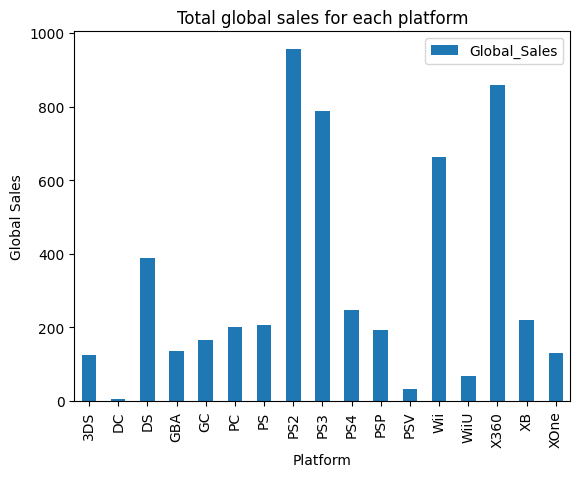

In [26]:
# Your code here
dfv_table = dfv.pivot_table(index="Platform",values="Global_Sales",aggfunc="sum")
ax = dfv_table.plot.bar(title='Total global sales for each platform');
ax.set_ylabel("Global Sales")

> ### Question 1b
> The plot shows **total** number of users (`User_Count`) for each `Genre`. <br><br>
![BP2](barplot2.png)<br>
> `Hint:` To produce a horizontal bar plot, use `.barh()` in place of `.bar()`.

In [13]:
dfv = pd.read_csv("video-game-sales.csv")
dfv.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
1,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
2,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
3,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
4,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E


Text(0.5, 0, 'Total Number of Users')

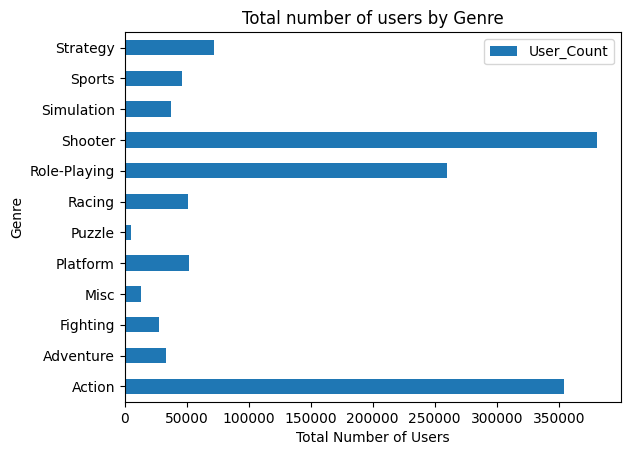

In [25]:
# Your code here
dfv_table2 = dfv.pivot_table(index="Genre",values="User_Count", aggfunc="sum")
ax = dfv_table2.plot.barh()
ax.set_title("Total number of users by Genre")
ax.set_ylabel("Genre")
ax.set_xlabel("Total Number of Users")

> ### Question 1c
> The scatter plot shows the **median** `User_Score` vs **total** `User_Count` for each platform (where each point represents a single platform)

> ![SC1](scatter1.png)<br>

In [19]:
dfv = pd.read_csv("video-game-sales.csv") 
dfv.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
1,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
2,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
3,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
4,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E


Text(0, 0.5, 'Median Score of Users (User_Score)')

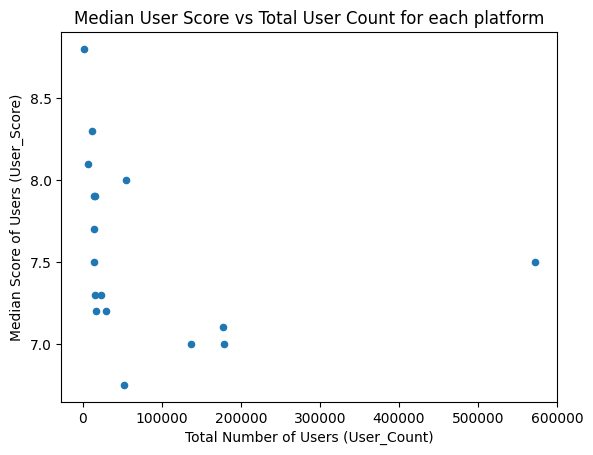

In [37]:
dfv_table2 = dfv.pivot_table(index="Platform",values=["User_Score","User_Count"], aggfunc={'User_Score':'median', 'User_Count':'sum'})
dfv_table2


ax = dfv_table2.plot.scatter(x="User_Count",y="User_Score",title="Median User Score vs Total User Count for each platform")
ax.set_xlabel("Total Number of Users (User_Count)")
ax.set_ylabel("Median Score of Users (User_Score)")

> ## Question 2a
> Import the video-game sales dataset `video-game-sales.csv`, which contains data about video games, their publishers,  Sales, Ratings etc. <br>
> **Aggregate the data using `pivot_table` to get the `mean` Global_Sales and `mean` User_Count by Genre and Platform like the image below.**<br>
![Average](MPQ2_Img.png)
<br><br>
**`Note:` You may see NANs in the table after aggregation, what could be the reason behind them?**

In [39]:
import pandas as pd
dfv = pd.read_csv("video-game-sales.csv")

In [41]:
# Your code goes here
dfv_table3 = dfv.pivot_table(index="Genre",columns="Platform",values=["Global_Sales","User_Count"], aggfunc="mean")
dfv_table3

Global_Sales                                                 \
Platform              3DS     DC        DS       GBA        GC        PC   
Genre                                                                      
Action           0.471194    NaN  0.463404  0.359403  0.355000  0.137039   
Adventure        0.177500  0.665  0.222326  0.426364  0.308000  0.046364   
Fighting         0.341250  0.280  0.211176  0.195000  0.591481  0.043333   
Misc             0.416364    NaN  1.645714  0.620714  0.650000  0.610000   
Platform         1.322857  0.120  1.417436  0.740364  0.469630  0.042632   
Puzzle           0.260909    NaN  0.778636  0.693750  0.380000  0.047500   
Racing           2.330000  0.090  1.435714  0.493077  0.296410  0.058312   
Role-Playing     0.680000  0.154  0.575794  0.535750  0.475556  0.368720   
Shooter          0.366667  0.050  0.178718  0.090000  0.260566  0.197107   
Simulation       1.786667  0.520  0.936304  0.195455  0.839000  0.337280   
Sports           0.550000  1.090  0.231481  0.246400  0.250238  0.156739   
Strategy         0.313333    NaN  0.215854  0.433750  0.333636  0.142714   

                                                      ... User_Count  \
Platform            PS       PS2       PS3       PS4  ...        PS2   
Genre                                                 ...              
Action        1.900000  0.872283  1.096250  0.730374  ...  75.344203   
Adventure     0.220000  0.227959  0.715217  0.177895  ...  22.469388   
Fighting      1.183125  0.796829  0.802167  0.474000  ...  37.426829   
Misc          1.150000  0.623175  0.634286  0.343750  ...  16.412698   
Platform      1.058333  0.654568  0.912609  0.455000  ...  41.271605   
Puzzle        0.130000  0.574286  0.400000  0.030000  ...  25.000000   
Racing        1.903333  0.860872  0.882394  0.450000  ...  27.926174   
Role-Playing  1.473000  0.563714  0.733977  0.600000  ...  67.814286   
Shooter       0.362941  0.647273  1.377795  1.600500  ...  33.012987   
Simulation    0.342000  0.674118  0.420000  0.360000  ...  24.705882   
Sports        1.296875  0.917190  0.820250  1.232222  ...  23.404762   
Strategy      0.055714  0.174717  0.356667  0.095000  ...  13.433962   

                                                                         \
Platform             PS3         PS4        PSP         PSV         Wii   
Genre                                                                     
Action        309.670833  457.420561  40.191011   81.466667   55.661765   
Adventure     423.869565  191.736842  19.761905   59.705882   16.392857   
Fighting       89.333333  237.866667  27.852941   60.900000   71.625000   
Misc           29.142857   63.125000  18.370370   84.666667   27.750000   
Platform      367.173913  305.928571  29.851852  150.285714  169.928571   
Puzzle         50.000000  124.000000  11.684211   51.000000   24.277778   
Racing         91.464789  209.428571  24.956522   98.333333   39.484848   
Role-Playing  289.113636  728.161290  38.500000   96.000000   79.571429   
Shooter       309.622047  942.625000  33.578947  411.000000   72.263158   
Simulation     31.105263   61.000000  16.555556         NaN   23.555556   
Sports         46.533333  234.711111  11.880597   47.000000   28.772152   
Strategy       68.222222   53.166667  17.941176         NaN   55.428571   

                                                              
Platform             WiiU        X360         XB        XOne  
Genre                                                         
Action         167.955556  193.039683  19.376623  204.265625  
Adventure        7.000000  166.812500  18.535714  247.500000  
Fighting       105.250000   65.661765  15.216216  115.500000  
Misc            94.928571   38.820896   7.478261   68.384615  
Platform       354.157895   94.875000  14.781250  114.666667  
Puzzle         140.000000   41.333333   8.000000         NaN  
Racing        1599.000000   89.779221  14.896226  257.882353  
Role-Playing   878.000000  449.7936

> ## **Question 2b** 
> Now suppose not all platforms are important in your analysis. Aggregate the data to get mean `User_Count` by Genre and Platform, but only for selected Platforms:['PC', 'PS', 'PS2', 'PS3', 'PS4'] 

In [47]:
# Your code goes here
dfv_table3['User_Count'].loc[:, 'PC':'PS4']

Platform,PC,PS,PS2,PS3,PS4
Genre,,,,,
Action,520.830097,97.931034,75.344203,309.670833,457.420561
Adventure,210.795455,13.000000,22.469388,423.869565,191.736842
Fighting,346.666667,52.437500,37.426829,89.333333,237.866667
Misc,41.600000,38.800000,16.412698,29.142857,63.125000
Platform,411.421053,76.222222,41.271605,367.173913,305.928571
Puzzle,182.000000,5.500000,25.000000,50.000000,124.000000
Racing,192.974026,39.555556,27.926174,91.464789,209.428571
Role-Playing,1097.376000,156.500000,67.814286,289.113636,728.161290
Shooter,967.720812,19.764706,33.012987,309.622047,942.625000


## II. Random Numbers

> ## Question 3
> Generate 100,000 random points following a uniform distribution in the interval 20 to 60. Visualize the distribution using a histogram and confirm that it is indeed uniform.

In [48]:
# Code to import required libraries
import numpy as np
from numpy.random import rand

np.random.seed(1)   # set the random seed

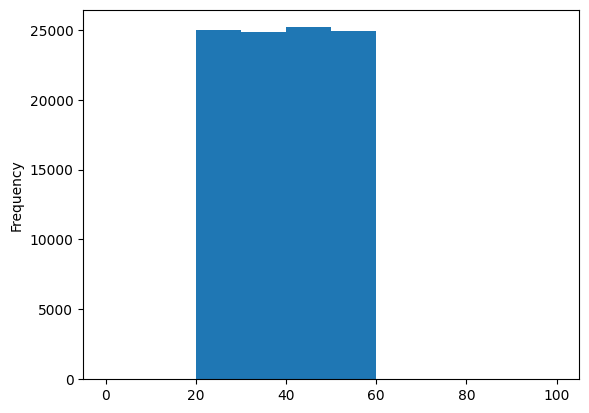

In [50]:
# Your code here
a,b = 20,60
randnums_u = rand(100000)
s = pd.Series( (b-a)*randnums_u + a ) # rescale the random variable so it's in the interval [a,b]
s.plot.hist(bins = 10, range=(0,100) );

## III. Data Cleaning
> ## **Question 4** 
> There was a survey that collected data (`person-type.csv`) whether the respondent was an "Early Bird" or a "Night Owl". People were expected to respond with either Yes / No to each type. It was allowed for a person to respond Yes or No to both too. However, the responses were not standarized, meaning people responded with various flavors of Yes and No. (like y, YES, n, N etc.). **Your objective is to standardize the data, and find out how many of people responded Yes to each type.**
>
> You can solve the problem in the following steps
> 1. use .unique() to find all possible responses.
> 2. use .replace() to fix the errors and produce a clean dataset.
> 3. Find out how many people responded Yes to "early bird" and "night owl".

In [60]:
df = pd.read_csv('person-type.csv')
df.head()

,Early_Bird,Night_Owl
0,Yes,No
1,No,Yes
2,Yes,No
3,Yes,No
4,N,Y


In [65]:
# Your code here
print(df.Early_Bird.unique())
print(df.Night_Owl.unique())
df = df.replace(["y", "Y", "Ye","YES"],"Yes")
df = df.replace(["NO", "n", "N"],"No")
print(len(df[df["Early_Bird"] == "Yes"]))
print(len(df[df["Night_Owl"] == "Yes"]))

['Yes' 'No']
['No' 'Yes']
20
20


> ## **Question 5**
> This question deals with removal of outliers. There are 4 obvious outliers in the dataset `blobs.csv` (see scatter plot below). **Remove these obvious outliers, and plot the resulting dataset.**

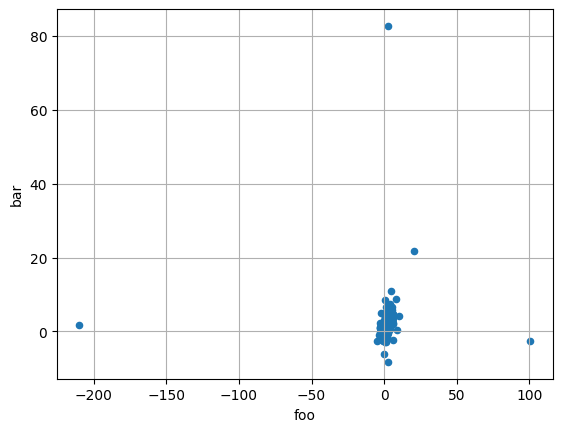

In [74]:
import pandas as pd
df = pd.read_csv("blobs.csv")
df.plot.scatter(x="foo", y="bar", grid=True);

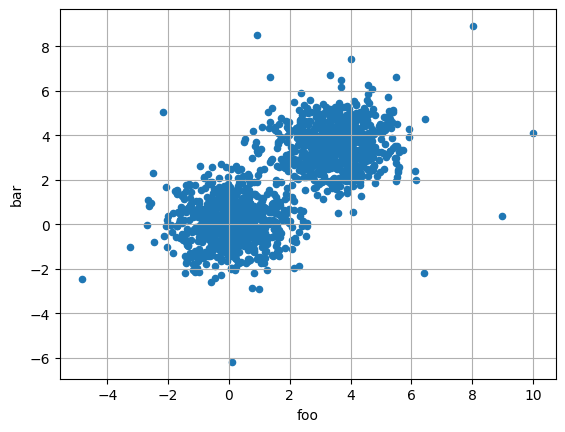

In [75]:
# Your code here
m = df.bar.mean() 
s = df.bar.std()
df = df[ (df.bar > m-3*s) & (df.bar < m+3*s) ]

m = df.foo.mean()
s = df.foo.std()
df = df[ (df.foo > m-3*s) & (df.foo < m+3*s) ]

df.plot.scatter(x="foo", y="bar", grid=True);

